In [5]:
#***************************************** Create data frames ********************************************


import pandas as pd

#Top 10000 File
top_10000_file='./Data/Top10000.csv'

albums=pd.read_csv(top_10000_file,header=0)

#albums.head(2)

#Events File
world_events_file='./Data/WorldEvents.csv'

events=pd.read_csv(world_events_file,header=0)

#events.head(2)

#Music Emotions File
music_emotions_file='./Data/MusicEmotionList.csv'

musicEmotions=pd.read_csv(music_emotions_file,header=0)

#musicEmotions.head(2)




In [53]:
############# Profiling and Transformation section ############################

#***************************** 'Albums' transformation ***************************************
import numpy as np

#change 'album release date' column to release_date
#albums=albums.rename(columns={'Album Release Date':'release_date'})

#albums.head(1)

#Drop unneeded columns:

#albums.drop(columns=['Track URI','Artist URI(s)','Album URI','Album Artist URI(s)','Album Image URL','Time Signature','Label','Copyrights'],inplace=True)
#albums.drop(columns=['Album Artist Name(s)'],inplace=True)
#albums.drop(columns=['Disc Number', 'Track Number','Track Duration (ms)','Track Preview URL','Added By','Added At','Artist Genres','ISRC','Key'],inplace=True)
#albums.drop(columns=['Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence'],inplace=True)
#albums.drop(columns=['Album Genres'],inplace=True)
#print(albums.dtypes)

#sort in ascending order 
#albums.sort_values(['Album Genres'],ascending=True)

#change 'release_date' object to a datetime object
# 'errors=coerce' will change any bad date values to 'NaT' which means 'Not a Time'
#albums['release_date']=pd.to_datetime(albums['release_date'],format='%Y-%m-%d',errors='coerce')

#Add 'album_year' column to top 10000 file
#albums['album_year']=albums['release_date'].dt.year

#drop blank album years
#albums.dropna(subset=['album_year'],inplace=True)

#Change datatypes for "Album Year"
#albums['album_year'] = albums['album_year'].astype(int)

#Show breakdown of release date
#release_date_values= albums['release_date'].value_counts()
#print(release_date_values)

#show blank rows by release date
#albums.loc[albums.release_date.isna()]

#drop blank release date rows
#albums.dropna(subset=['release_date'],inplace=True)

#create a function to add a 'Decade' column to the albums dataframe
#def decade_column(df,year_column='album_year'):
    #Create a lambda function to create the Decade column
    # '//' is a 'floor division' operator and is used to return the largest integer that is less than or equal 
    #to the result of the division
    #df['decade']=df[year_column].apply(lambda album_year: (album_year // 10)* 10)

#decade_column(albums)

###### Delete rows where Decade is < 1960

#Find albums where decade is less than 1960 
#condition=albums['decade'] < 1960

#Return albums where decade is greater than or equal to 1960 and rename dataframe to 'updated_albums'
updated_albums=albums[~condition]

#print(updated_albums)

#sort in descending order by decade
#updated_albums.sort_values(['decade'],ascending=True)

#Get the max & min popularity value
#updated_albums['Popularity'].agg([max,min])


#show datatypes in 'albums'
#print(updated_albums.dtypes)

#Show specific rows
updated_albums.head(2)



,Track Name,Artist Name(s),Album Name,release_date,Explicit,Popularity,Danceability,Energy,Tempo,album_year,decade
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,False,0,0.617,0.872,111.458,1992,1990
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,False,64,0.825,0.743,127.045,2009,2000


In [11]:
#*********************************** 'Music Emotions' Transformation *************************

#Drop unneeded columns
#musicEmotions.drop(columns=['lyrics','len','danceability','loudness'],inplace=True)
#musicEmotions.drop(columns=['acousticness','instrumentalness','valence','age'],inplace=True)
#musicEmotions.drop(columns=['feelings','music','movement/places'],inplace=True)

#change 'release_date' to 'release_year'
musicEmotions=musicEmotions.rename(columns={'release_date':'release_year'})

#show blank rows by release year
#musicEmotions.loc[musicEmotions.release_year.isna()]

#show blank rows by genre
#musicEmotions.loc[musicEmotions.genre.isna()]

#show blank rows by topic
#musicEmotions.loc[musicEmotions.topic.isna()]


#show blank rows by release year
#musicEmotions.loc[musicEmotions.release_year.isna()]

#create a function to add a 'Decade' column to the musicEmotions dataframe
def decade_column(df,year_column='release_year'):
    #Create a lambda function to create the Decade column
    # '//' is a 'floor division' operator and is used to return the largest integer that is less than or equal 
    #to the result of the division
    df['decade']=df[year_column].apply(lambda release_year: (release_year // 10)* 10)

decade_column(musicEmotions)

###### Delete rows where Decade is < 1960

#Find albums where decade is less than 1960 
condition2=musicEmotions['decade'] < 1960

#Return albums where decade is greater than or equal to 1960 and rename dataframe to 'updated_albums'
updated_musicEmotions=musicEmotions[~condition2]

#sort in descending order by decade
updated_musicEmotions.sort_values(['decade'],ascending=True)

#show datatypes in 'Music Emotions'
#print(updated_musicEmotions.dtypes)

#Show specific rows
#updated_musicEmotions.head(2)



,Unnamed: 0,artist_name,track_name,release_year,genre,dating,violence,world/life,night/time,shake the audience,...,romantic,communication,obscene,light/visual perceptions,family/spiritual,like/girls,sadness,energy,topic,decade
325,842,jerry lee lewis,your cheating heart,1960,pop,0.204740,0.002506,0.002506,0.129818,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.691682,sadness,1960
17507,55254,kenny drew,ballade,1960,jazz,0.000693,0.433200,0.098156,0.000693,0.000693,...,0.000693,0.232117,0.000693,0.065949,0.034321,0.000693,0.000693,0.213189,violence,1960
17508,55255,oliver nelson,in time,1960,jazz,0.000578,0.000578,0.493852,0.000578,0.000578,...,0.000578,0.000578,0.000578,0.000578,0.000578,0.000578,0.406135,0.414396,world/life,1960
17509,55261,oscar peterson,remember,1960,jazz,0.001645,0.001645,0.470975,0.105041,0.001645,...,0.047002,0.001645,0.035225,0.001645,0.001645,0.001645,0.160945,0.267244,world/life,1960
17510,55263,lee morgan,the hearing,1960,jazz,0.001144,0.344246,0.001144,0.001144,0.001144,...,0.001144,0.001144,0.001144,0.551165,0.017535,0.001144,0.001144,0.469453,violence,1960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16221,51722,grace potter & the nocturnals,paris (ooh la la),2010,blues,0.003289,0.003289,0.003289,0.003289,0.003289,...,0.003289,0.003289,0.003289,0.003289,0.136099,0.003289,0.189045,0.866863,music,2010
16222,51724,status quo,in the army now 2010,2010,blues,0.001595,0.488525,0.001595,0.142422,0.001595,...,0.001595,0.166205,0.001595,0.001595,0.053915,0.001595,0.001595,0.604592,violence,2010
16223,51725,jj grey & mofro,the hottest spot in hell,2010,blues,0.001096,0.347098,0.057387,0.001096,0.063598,...,0.001096,0.001096,0.359832,0.001096,0.001096,0.001096,0.001096,0.775769,obscene,2010
16214,51701,the black angels,true believers,2010,blues,0.000975,0.076452,0.000975,0.000975,0.059549,...,0.066532,0.320383,0.000975,0.000975,0.000975,0.000975,0.000975,0.760753,music,2010


In [12]:
#*************************************** 'Events' transformation *****************************
#create a function to add a 'Decade' column to the Events dataframe

def decade_column(df,year_column='Year'):
    #Create a lambda function to create the Decade column
    # '//' is a 'floor division' operator and is used to return the largest integer that is less than or equal 
    #to the result of the division
    df['decade']=df[year_column].apply(lambda Year: (Year // 10)* 10)

decade_column(events)

#show blank rows by Year
#events.loc[events.Year.isna()]

#drop blank rows by Year
#events.dropna(subset=['Year'],inplace=True)

#Show specific rows
#events.head(2)

#show datatypes in 'events'
#print(events.dtypes)

In [13]:
#********************* Joined Datasets *********************
#Events & Albums

#combine Events & Albums dataframes using an outer join to create the events_albums dataframe
events_albums = pd.merge(events,updated_albums,on='decade',how='outer')
#print(events_albums)

events_albums.head()

,Year,Event Description,decade,Track Name,Artist Name(s),Album Name,release_date,Explicit,Popularity,Danceability,Energy,Tempo,album_year
0,2004,9/11 Commission,2000,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,False,64,0.825,0.743,127.045,2009
1,2004,9/11 Commission,2000,It's Like That,"Run–D.M.C., Jason Nevins",The Greatest Hits,2002-09-10,False,68,0.852,0.874,129.029,2002
2,2004,9/11 Commission,2000,Here Without You,3 Doors Down,Away From The Sun,2002-11-12,False,80,0.557,0.533,143.994,2002
3,2004,9/11 Commission,2000,Listen to the Band - Single Version,The Monkees,The Best of The Monkees,2003-01-01,False,31,0.260,0.659,184.380,2003
4,2004,9/11 Commission,2000,Homecoming,Hey Monday,Hold On Tight,2008-10-07,False,47,0.393,0.958,150.074,2008


In [14]:
#Topics & Events

#combine Events & Topics dataframes using an outer join to create the events_topics dataframe
events_topics = pd.merge(events,updated_musicEmotions,on='decade',how='outer')
#print(events_topics)

events_topics.head()

,Year,Event Description,decade,Unnamed: 0,artist_name,track_name,release_year,genre,dating,violence,...,family/gospel,romantic,communication,obscene,light/visual perceptions,family/spiritual,like/girls,sadness,energy,topic
0,2004,9/11 Commission,2000,13766.0,3 doors down,duck and run,2000.0,pop,0.000877,0.000877,...,0.000877,0.000877,0.143033,0.000877,0.062287,0.021794,0.000877,0.284506,0.919917,world/life
1,2004,9/11 Commission,2000,13767.0,ricky nelson,hello mary lou,2000.0,pop,0.000923,0.000923,...,0.000923,0.393975,0.118949,0.000923,0.000923,0.132796,0.000923,0.140091,0.601589,romantic
2,2004,9/11 Commission,2000,13770.0,modest mouse,perfect disguise,2000.0,pop,0.002105,0.175750,...,0.002105,0.002105,0.114916,0.361709,0.002105,0.002105,0.109512,0.140042,0.359339,obscene
3,2004,9/11 Commission,2000,13774.0,joe,i believe in you,2000.0,pop,0.001224,0.001224,...,0.001224,0.063030,0.001224,0.001224,0.078282,0.026630,0.001224,0.058538,0.525511,world/life
4,2004,9/11 Commission,2000,13776.0,fuel,empty spaces,2000.0,pop,0.001504,0.384026,...,0.001504,0.001504,0.001504,0.001504,0.278633,0.001504,0.001504,0.313281,0.943942,violence


################## Visuals ################

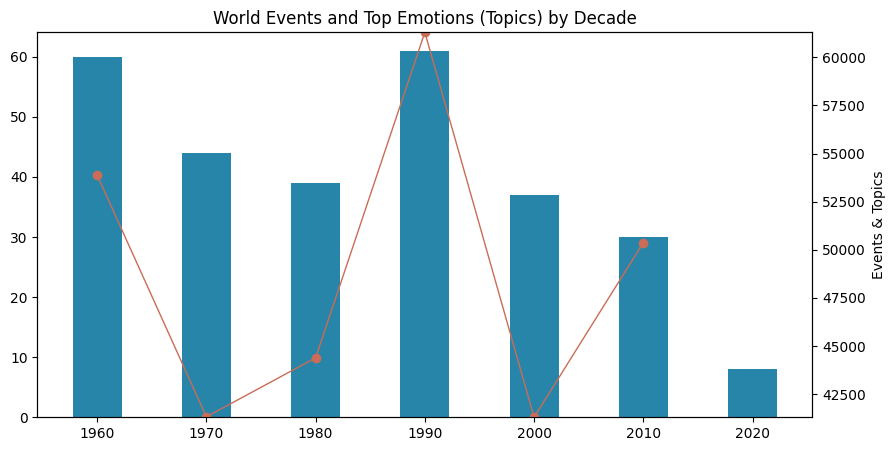

In [50]:
################################### Events & Topics ##################################### 
import matplotlib.pyplot as plt

#Create a variable to hold the top emotion(topic) by decade 
topic_counts=events_topics.groupby(['decade','topic']).size()
#print(topic_counts)

top_emotion=topic_counts.groupby('decade').max()
#print(top_emotion)

#Count the number of world events by decade, #.nunique() returns the unique event values
event_count=events_topics.groupby('decade')['Event Description'].nunique()
#print(event_count)

#Create the container that will hold the visual, also known as a 'figure'
fig=plt.figure(figsize=(10,5))

#Create the first Axes (plot)

#The three arguments in the subplot() function describe the number of rows, columns and the index of the current plot
axes1=plt.subplot(1,1,1)

#Plot the bar chart
axes1.bar(event_count.index,event_count.values,width=4.5,color='#2785A9')

# Create the Second Axes (plot)
axes2=axes1.twinx()

#Plot the line for the 2nd axes
axes2.plot(top_emotion.index,top_emotion.values,marker='o',linestyle='-',color='#CA6C57',linewidth=1,label='Topics')

#Set the minimum and maximum values for the second axes
axes2.set_ylim(top_emotion.min(),top_emotion.max())

# Add a title to the chart
plt.title("World Events and Top Emotions (Topics) by Decade")

#Label the X and Y axis
plt.xlabel('Decade')
plt.ylabel('Events & Topics')

#Show the chart
plt.show()



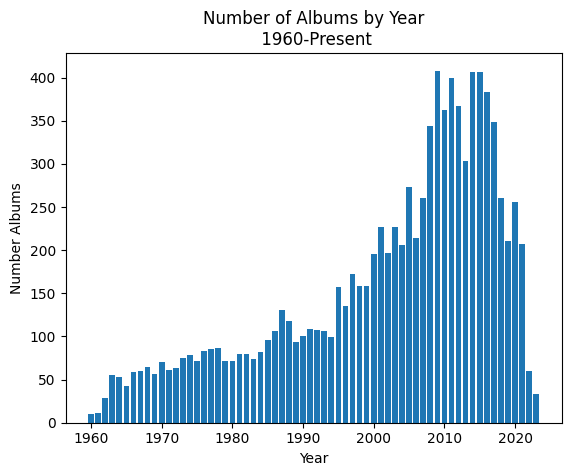

Artist Name(s)            album_year
"Weird Al" Yankovic       2009          1
*NSYNC                    1997          2
                          2000          3
                          2001          1
                          2005          1
                                       ..
will.i.am, Cody Wise      2014          2
will.i.am, Eva Simons     2013          1
will.i.am, Justin Bieber  2013          2
will.i.am, Miley Cyrus    2013          1
will.i.am, Nicki Minaj    2010          1
Name: album_year, Length: 6780, dtype: int64

In [54]:

#********** Number of Albums by Year #########
import matplotlib.pyplot as plt

#Create a variable to hold a count of unique album years(value_counts), then sort in ascending order (sort_index)
album_count=updated_albums['album_year'].value_counts().sort_index()

#Create the bar chart with 'album_count.index' for the x axis and album_count.values for the Y axis
plt.bar(album_count.index,album_count.values)

# Add a title to the chart
plt.title("Number of Albums by Year\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number Albums')

#Show the chart
plt.show()

#Show number of albums by artist and year
albums_per_artist= updated_albums.groupby(['Artist Name(s)','album_year']).album_year.count()
albums_per_artist

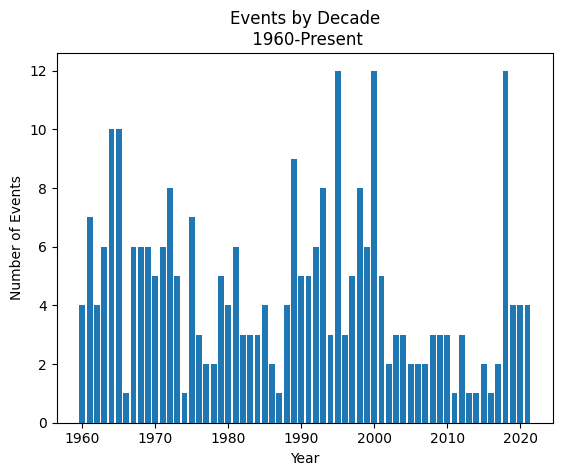

Event Description                                                                   Year
 9/11 Commission                                                                    2004    1
 AOL Purchases Time Warner                                                          2000    1
 Anthrax Attacks U.S.                                                               2001    1
 Barak Obama Inaugurated President                                                  2009    1
 Barak Obama to be Democratic Candidate                                             2008    1
                                                                                           ..
Watergate scandal becomes public                                                    1973    1
Watts Riots in Los Angeles                                                          1965    1
William Jefferson "Bill" Clinton inaugurated as forty-second President of the U.S.  1993    1
Woodstock music festival in upstate New York                     

In [56]:
#**************************** Number of events by Year ****************************

import matplotlib.pyplot as plt

#Create a variable to hold a count of unique Event years(value_counts), then sort in ascending order (sort_index)
event_count=events['Year'].value_counts().sort_index()

#Create the bar chart with 'event_count.index' for the x axis and event_count.values for the Y axis
plt.bar(event_count.index,event_count.values)

# Add a title to the chart
plt.title("Events by Decade\n 1960-Present")

#Label the X and Y axis
plt.xlabel('Year')
plt.ylabel('Number of Events')

#Show the chart
plt.show()

#Show number of events by Description and year
event_details= events.groupby(['Event Description','Year']).Year.count()

event_details